In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.cluster import (KMeans,
                             MeanShift,
                             estimate_bandwidth,
                             AffinityPropagation,
                             AgglomerativeClustering,
                             SpectralClustering)
from sklearn.mixture import GaussianMixture

#pip install -U scikit-learn-extra

from sklearn_extra.cluster import KMedoids

#pip install -U scikit-fuzzy

import skfuzzy as fuzz

#!pip install -U scikit-learn

from sklearn.metrics.cluster import (adjusted_rand_score,
                                     adjusted_mutual_info_score,
                                     v_measure_score,
                                     completeness_score,
                                     fowlkes_mallows_score)

# Подготовка данных

In [9]:
X_raw=pd.read_csv("wine.csv")
X_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [10]:
X=X_raw.copy()
X['type'].loc[(X['type'] == 'red')] = -1
X['type'].loc[(X['type'] == 'white')] = 1
X

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,-1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [31]:
data=X.values
np.shape(data)

(6497, 13)

# K-Means


--- 0.6938319206237793 seconds with 2 clusters ---

adjusted rand score:  0.009390003535886782
adjusted mutual info:  0.21115479112121352
v measure score:  0.21716507360513962
completeness score:  0.9574045605692397
fowlkes mallows score:  0.09781405415436849
Q1:  467816590.23950243
Q2:  1005856299.0025036
Q1/Q2:  0.46509286734440186

--- 0.5637948513031006 seconds with 3 clusters ---

adjusted rand score:  0.017769879596597583
adjusted mutual info:  0.30895688088281176
v measure score:  0.318688139877699
completeness score:  0.9586960615401069
fowlkes mallows score:  0.116791908406905
Q1:  230133548.18059468
Q2:  1243539341.0614085
Q1/Q2:  0.18506334345977898

--- 0.6753928661346436 seconds with 4 clusters ---

adjusted rand score:  0.02627502430194657
adjusted mutual info:  0.369330949978554
v measure score:  0.3819591278408021
completeness score:  0.9451494228737315
fowlkes mallows score:  0.13194880682529636
Q1:  143620098.7679816
Q2:  1330052790.4740448
Q1/Q2:  0.1079807506864399

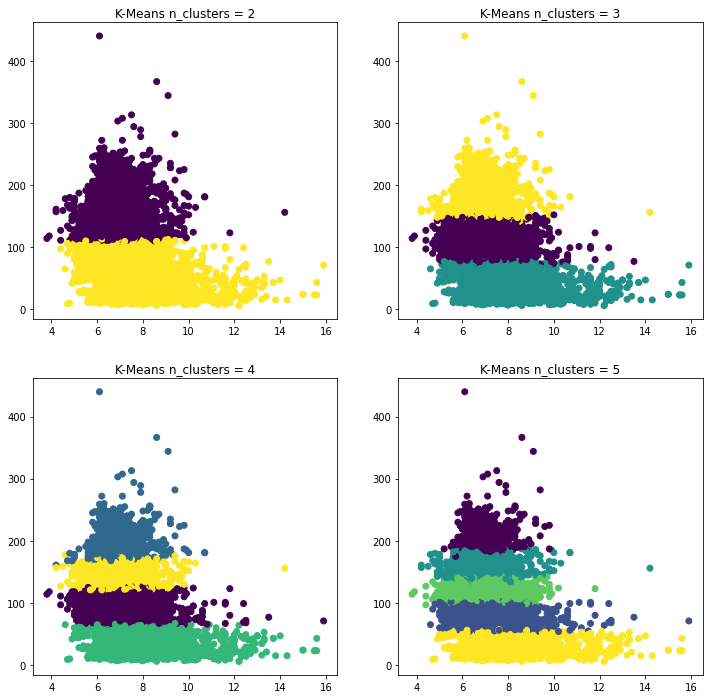

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(2,6):
  start_time=time.time()
  y_true=(X['total sulfur dioxide']*10).values
  y_pred = KMeans(n_clusters=i,init='k-means++').fit_predict(data)
  plt.subplot(2,2,i-1)
  plt.scatter(data[:, 0], data[:, 6], c=y_pred)
  plt.title("K-Means n_clusters = %d" % i)
  print("\n--- %s seconds with" % (time.time() - start_time), i , "clusters ---\n")
  print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
  print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
  print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
  print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
  print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
  Q1 = 0
  Q2 = 0
  Q3 = 0
  for k in range(i):
    q1 = 0
    q2 = 0
    row_xk = np.where(y_pred == k)
    x_k=data[row_xk]
    row_yk = np.where(y_pred > k)
    y_k=data[row_yk]
    for l in range(len(x_k)):
      for j in range(l+1,len(x_k)):
        q1+=np.linalg.norm(x_k[l]-x_k[j])
    Q1+=q1
    for l in range(len(x_k)):
      for j in range(len(y_k)):
        q2+=np.linalg.norm(x_k[l]-y_k[j])
    Q2+=q2
  Q3=Q1/Q2 
  print("Q1: ", Q1)
  print("Q2: ", Q2)
  print("Q1/Q2: ", Q3)

# Fuzzy K-Means


--- 0.0891575813293457 seconds with 2 clusters ---

adjusted rand score:  1.0
adjusted mutual info:  6.776263624061997e-16
v measure score:  0.19123843987258773
completeness score:  1.0
fowlkes mallows score:  0.0

--- 0.09972238540649414 seconds with 3 clusters ---

adjusted rand score:  0.0
adjusted mutual info:  7.660528296473754e-16
v measure score:  0.34567980324081743
completeness score:  0.9999999999999996
fowlkes mallows score:  0.0

--- 0.1349797248840332 seconds with 4 clusters ---

adjusted rand score:  0.0
adjusted mutual info:  7.660528296473754e-16
v measure score:  0.34567980324081743
completeness score:  0.9999999999999996
fowlkes mallows score:  0.0

--- 0.14946913719177246 seconds with 5 clusters ---

adjusted rand score:  0.0
adjusted mutual info:  1.365038429266062e-15
v measure score:  0.6601023421816608
completeness score:  0.9999999999999998
fowlkes mallows score:  0.0


<Figure size 864x864 with 0 Axes>

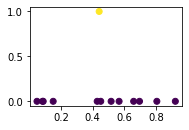

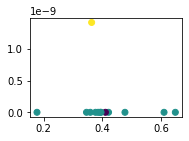

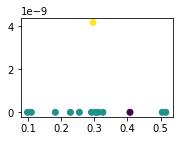

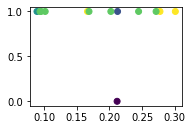

In [75]:
plt.figure(figsize=(12, 12))
for i in range(2,6):
  start_time=time.time()
  y_true=(X['total sulfur dioxide'] ).values
  cntr, u, u0, d, jm, p, fpc  = fuzz.cmeans(data, c = i, m = 2, error = 0.05, maxiter = 6)
  y_pred = fuzz.cmeans_predict(data, cntr, m = fpc, error = 0.05, maxiter = 6)
  cluster_membership = np.argmax(u, axis=0)
  fig3, ax3 = plt.subplots()
  plt.subplot(2,2,i-1)
  plt.scatter(y_pred[1][0], y_pred[0][0], c=cluster_membership)
  print("\n--- %s seconds with" % (time.time() - start_time), i , "clusters ---\n")
  print("adjusted rand score: ",adjusted_rand_score(y_pred[0][1]*10,cluster_membership))                       #-1.0 - 1.0
  print("adjusted mutual info: ", adjusted_mutual_info_score(y_pred[0][0]*10,cluster_membership))              #-1.0 - 1.0
  print("v measure score: ", v_measure_score(y_pred[0][0]*10,cluster_membership))                              # 0.0 - 1.0
  print("completeness score: ", completeness_score(y_pred[0][0]*10,cluster_membership))                        # 0.0 - 1.0
  print("fowlkes mallows score: ", fowlkes_mallows_score(y_pred[0][0]*10,cluster_membership))

6

# EM

E-шаг. На первом E-шаге мы каким-либо образом, например, случайным, выбираем скрытые переменные, в нашем случае это будут математическое ожидание — $\mu$ и стандартное отклонение — $\sigma$. Используя выбранные переменные, рассчитываем вероятность отнесения каждого объекта к тому или иному кластеру. При последующих E-шагах используются скрытые переменные, определенные на M-шагах.

M-шаг. На M-шаге мы, в соответствии с полученными на E-шаге значениями вероятностей отнесения каждого объекта к тому или иному кластеру, пересчитываем скрытые переменные $\mu$ и $\sigma$


--- 0.20395731925964355 seconds with 2 clusters ---

adjusted rand score:  0.004206013724444913
adjusted mutual info:  0.10798397880560122
v measure score:  0.11481274908571588
completeness score:  0.5915132241966026
fowlkes mallows score:  0.0791419346628115
Q1:  691373500.2366861
Q2:  782299389.005321
Q1/Q2:  0.8837709832750279

--- 0.34416675567626953 seconds with 3 clusters ---

adjusted rand score:  0.004417777443144635
adjusted mutual info:  0.1180114224792345
v measure score:  0.13048392480518686
completeness score:  0.5835201480482165
fowlkes mallows score:  0.07910680704893615
Q1:  660130051.6189156
Q2:  813542837.623085
Q1/Q2:  0.8114262963061747

--- 0.3472416400909424 seconds with 4 clusters ---

adjusted rand score:  0.006276136077583317
adjusted mutual info:  0.13192934465301112
v measure score:  0.14820802496101632
completeness score:  0.46644203475889945
fowlkes mallows score:  0.0750369109769836
Q1:  425114697.8128776
Q2:  1048558191.4293557
Q1/Q2:  0.4054278544459005

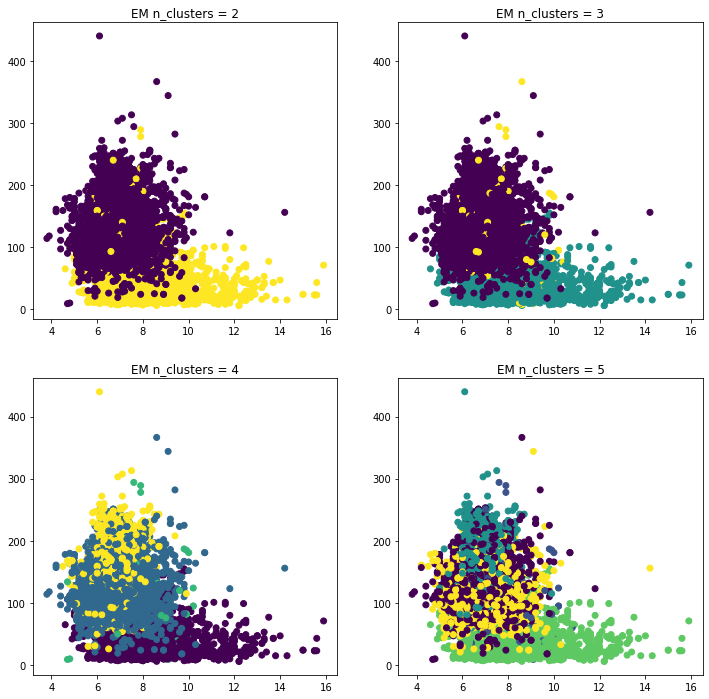

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(2,6):
  start_time=time.time()
  y_true=(X['total sulfur dioxide'] * 10).values
  y_pred = GaussianMixture(n_components=i).fit_predict(data)
  plt.subplot(2,2,i-1)
  plt.scatter(data[:, 0], data[:, 6], c=y_pred)
  plt.title("EM n_clusters = %d" % i)
  print("\n--- %s seconds with" % (time.time() - start_time), i , "clusters ---\n")
  print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
  print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
  print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
  print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
  print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
  Q1 = 0
  Q2 = 0
  Q3 = 0
  for k in range(i):
    q1 = 0
    q2 = 0
    row_xk = np.where(y_pred == k)
    x_k=data[row_xk]
    row_yk = np.where(y_pred > k)
    y_k=data[row_yk]
    for l in range(len(x_k)):
      for j in range(l+1,len(x_k)):
        q1+=np.linalg.norm(x_k[l]-x_k[j])
    Q1+=q1
    for l in range(len(x_k)):
      for j in range(len(y_k)):
        q2+=np.linalg.norm(x_k[l]-y_k[j])
    Q2+=q2
  Q3=Q1/Q2 
  print("Q1: ", Q1)
  print("Q2: ", Q2)
  print("Q1/Q2: ", Q3)  

# Mean Shift

 Здесь стоит уточнить, что количество кластеров установить для данного метода кластеризации нельзя намеренно. Сам метод определяет количество кластеров в зависимости от данных. Мы можем угадать параметр bandwidth ,и он уже в свою очередь повлияет на количество кластеров.


--- 215.58856892585754 seconds with 6 clusters ---

adjusted rand score:  0.010216381274161064
adjusted mutual info:  0.24584164923065382
v measure score:  0.2620674407627902
completeness score:  0.9150032298906449
fowlkes mallows score:  0.09970121354628864
Q1:  400467585.7843828
Q2:  1073205303.4577174
Q1/Q2:  0.373150956759282


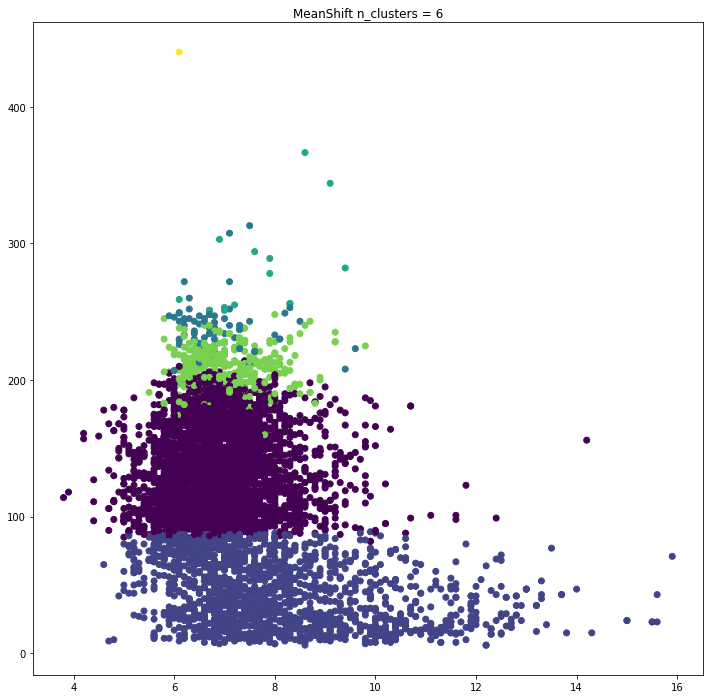

In [27]:
plt.figure(figsize=(12, 12))

start_time=time.time()
y_true=(X['total sulfur dioxide'] * 10).values
bandwidth = estimate_bandwidth(data)
y_pred = MeanShift(bandwidth=bandwidth).fit_predict(data)
plt.subplot(1,1,1)
plt.scatter(data[:, 0], data[:, 6], c=y_pred)
plt.title("MeanShift n_clusters = %d" % len(np.unique(y_pred)))
print("\n--- %s seconds with" % (time.time() - start_time), len(np.unique(y_pred)) , "clusters ---\n")
print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
Q1 = 0
Q2 = 0
Q3 = 0
for k in range(i):
  q1 = 0
  q2 = 0
  row_xk = np.where(y_pred == k)
  x_k=data[row_xk]
  row_yk = np.where(y_pred > k)
  y_k=data[row_yk]
  for l in range(len(x_k)):
    for j in range(l+1,len(x_k)):
      q1+=np.linalg.norm(x_k[l]-x_k[j])
  Q1+=q1
  for l in range(len(x_k)):
    for j in range(len(y_k)):
      q2+=np.linalg.norm(x_k[l]-y_k[j])
  Q2+=q2
Q3=Q1/Q2 
print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q1/Q2: ", Q3)  


# K-Medoid


--- 1.4675869941711426 seconds with 2 clusters ---

adjusted rand score:  0.009599901587137041
adjusted mutual info:  0.211537736559364
v measure score:  0.21754303177621287
completeness score:  0.9487425093330754
fowlkes mallows score:  0.09804346965087016
Q1:  459800185.017514
Q2:  1013872704.2244886
Q1/Q2:  0.4535087916872318

--- 2.329967737197876 seconds with 3 clusters ---

adjusted rand score:  0.017953969619132176
adjusted mutual info:  0.30983479695837174
v measure score:  0.31955382785538416
completeness score:  0.9612258433866995
fowlkes mallows score:  0.117483417420796
Q1:  230515081.2849769
Q2:  1243157807.9572515
Q1/Q2:  0.1854270470003786

--- 2.671219825744629 seconds with 4 clusters ---

adjusted rand score:  0.027062537978407297
adjusted mutual info:  0.37326140633679267
v measure score:  0.3857860598002205
completeness score:  0.9456082892053902
fowlkes mallows score:  0.13289629497915892
Q1:  141263109.67004338
Q2:  1332409779.572031
Q1/Q2:  0.10602076916263477

-

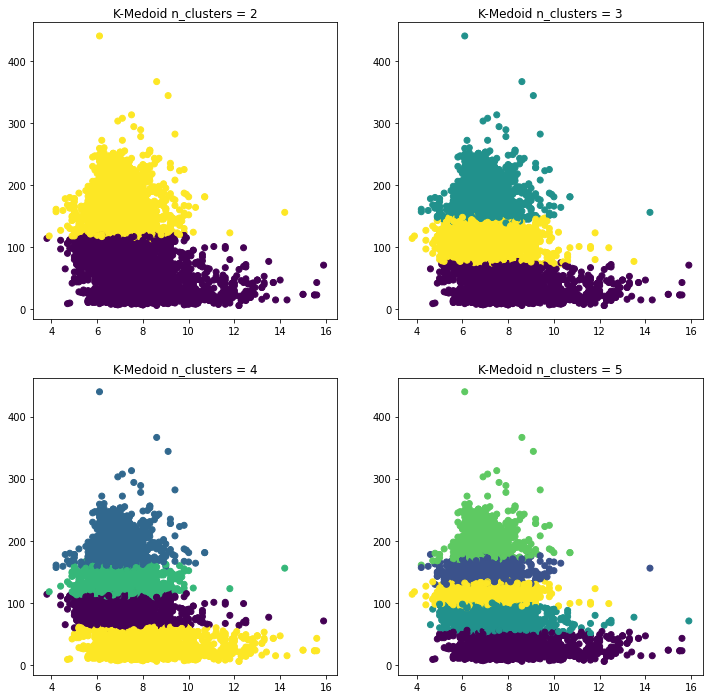

In [26]:
plt.figure(figsize=(12, 12))
for i in range(2,6):
  start_time=time.time()
  y_true=(X['total sulfur dioxide'] * 10).values
  y_pred = KMedoids(n_clusters=i).fit_predict(data)
  plt.subplot(2,2,i-1)
  plt.scatter(data[:, 0], data[:, 6], c=y_pred)
  plt.title("K-Medoid n_clusters = %d" % i)
  print("\n--- %s seconds with" % (time.time() - start_time), i , "clusters ---\n")
  print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
  print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
  print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
  print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
  print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
  Q1 = 0
  Q2 = 0
  Q3 = 0
  for k in range(i):
    q1 = 0
    q2 = 0
    row_xk = np.where(y_pred == k)
    x_k=data[row_xk]
    row_yk = np.where(y_pred > k)
    y_k=data[row_yk]
    for l in range(len(x_k)):
      for j in range(l+1,len(x_k)):
        q1+=np.linalg.norm(x_k[l]-x_k[j])
    Q1+=q1
    for l in range(len(x_k)):
      for j in range(len(y_k)):
        q2+=np.linalg.norm(x_k[l]-y_k[j])
    Q2+=q2
  Q3=Q1/Q2 
  print("Q1: ", Q1)
  print("Q2: ", Q2)
  print("Q1/Q2: ", Q3)  
  

# Affinity propagation

### damping = 0.5

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  else:



--- 151.07290410995483 seconds with damping=0.5 ---

adjusted rand score:  0.0
adjusted mutual info:  -2.0114113841281631e-16
v measure score:  -1.1327717766192265e-16
completeness score:  1.0
fowlkes mallows score:  0.07186623577254124
Q1:  0
Q2:  0
Q1/Q2:  0


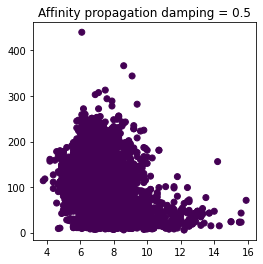

In [76]:
plt.figure(figsize=(4, 4))
start_time=time.time()
y_true=(X['total sulfur dioxide'] * 10).values
y_pred = AffinityPropagation(damping=0.5).fit_predict(data)
plt.subplot(1,1,1)
plt.scatter(data[:, 0], data[:, 6], c=y_pred)
plt.title("Affinity propagation damping = 0.5")
print("\n--- %s seconds with" % (time.time() - start_time), "damping=0.5 ---\n")
print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0  
Q1 = 0
Q2 = 0
Q3 = 0
for k in range(i):
  q1 = 0
  q2 = 0
  row_xk = np.where(y_pred == k)
  x_k=data[row_xk]
  row_yk = np.where(y_pred > k)
  y_k=data[row_yk]
  for l in range(len(x_k)):
    for j in range(l+1,len(x_k)):
      q1+=np.linalg.norm(x_k[l]-x_k[j])
  Q1+=q1
  for l in range(len(x_k)):
    for j in range(len(y_k)):
      q2+=np.linalg.norm(x_k[l]-y_k[j])
  Q2+=q2
if Q2==0:
  Q3=Q1
else:
  Q3=Q1/Q2 
print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q1/Q2: ", Q3) 

### damping = 0.7



--- 72.75251412391663 seconds with damping=0.7 ---

adjusted rand score:  0.12320236191496062
adjusted mutual info:  0.48509823607009706
v measure score:  0.5947185663662405
completeness score:  0.6906744724595353
fowlkes mallows score:  0.15951153277995062
Q1:  386862.8903532679
Q2:  420753181.7765064
Q1/Q2:  0.0009194532735791878


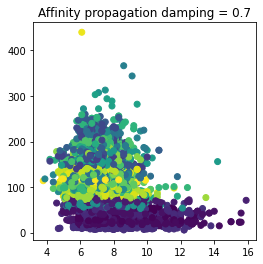

In [77]:
plt.figure(figsize=(4, 4))
start_time=time.time()
y_true=(X['total sulfur dioxide'] * 10).values
y_pred = AffinityPropagation(damping=0.7).fit_predict(data)
plt.subplot(1,1,1)
plt.scatter(data[:, 0], data[:, 6], c=y_pred)
plt.title("Affinity propagation damping = 0.7")
print("\n--- %s seconds with" % (time.time() - start_time), "damping=0.7 ---\n")
print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
Q1 = 0
Q2 = 0
Q3 = 0
for k in range(i):
  q1 = 0
  q2 = 0
  row_xk = np.where(y_pred == k)
  x_k=data[row_xk]
  row_yk = np.where(y_pred > k)
  y_k=data[row_yk]
  for l in range(len(x_k)):
    for j in range(l+1,len(x_k)):
      q1+=np.linalg.norm(x_k[l]-x_k[j])
  Q1+=q1
  for l in range(len(x_k)):
    for j in range(len(y_k)):
      q2+=np.linalg.norm(x_k[l]-y_k[j])
  Q2+=q2
Q3=Q1/Q2 
print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q1/Q2: ", Q3)  

### damping = 0.9


--- 70.45544719696045 seconds with damping=0.9 ---

adjusted rand score:  0.12904987889847752
adjusted mutual info:  0.49694917959802376
v measure score:  0.6012774555440147
completeness score:  0.702761552960633
fowlkes mallows score:  0.16878550821987656
Q1:  496444.2833141183
Q2:  496171311.68128586
Q1/Q2:  0.0010005501560175001


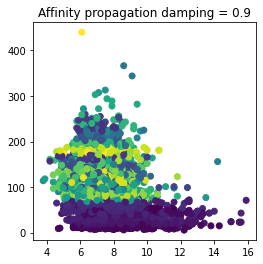

In [78]:
plt.figure(figsize=(4, 4))
start_time=time.time()
y_true=(X['total sulfur dioxide'] * 10).values
y_pred = AffinityPropagation(damping=0.9).fit_predict(data)
plt.subplot(1,1,1)
plt.scatter(data[:, 0], data[:, 6], c=y_pred)
plt.title("Affinity propagation damping = 0.9")
print("\n--- %s seconds with" % (time.time() - start_time), "damping=0.9 ---\n")
print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
Q1 = 0
Q2 = 0
Q3 = 0
for k in range(i):
  q1 = 0
  q2 = 0
  row_xk = np.where(y_pred == k)
  x_k=data[row_xk]
  row_yk = np.where(y_pred > k)
  y_k=data[row_yk]
  for l in range(len(x_k)):
    for j in range(l+1,len(x_k)):
      q1+=np.linalg.norm(x_k[l]-x_k[j])
  Q1+=q1
  for l in range(len(x_k)):
    for j in range(len(y_k)):
      q2+=np.linalg.norm(x_k[l]-y_k[j])
  Q2+=q2
Q3=Q1/Q2 
print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q1/Q2: ", Q3)   

# Agglomerative clustering

### Linkage = ward

мінімізує дисперсію кластерів, що об’єднуються.


--- 1.6115894317626953 seconds with 2 clusters ---

adjusted rand score:  0.007934666860582128
adjusted mutual info:  0.18403336757052804
v measure score:  0.1902488591747186
completeness score:  0.8326825691911856
fowlkes mallows score:  0.0900996493102437

--- 1.5701303482055664 seconds with 3 clusters ---

adjusted rand score:  0.01477394941520894
adjusted mutual info:  0.27898103373923555
v measure score:  0.28914727204514146
completeness score:  0.8786553935500658
fowlkes mallows score:  0.10546127364798642

--- 1.464592695236206 seconds with 4 clusters ---

adjusted rand score:  0.02015145712721079
adjusted mutual info:  0.32362402569485244
v measure score:  0.33727061208342507
completeness score:  0.866061713880539
fowlkes mallows score:  0.11496556300879661

--- 1.5575485229492188 seconds with 5 clusters ---

adjusted rand score:  0.025368520910484936
adjusted mutual info:  0.352046346506912
v measure score:  0.3687596881498501
completeness score:  0.8248135911545805
fowlkes m

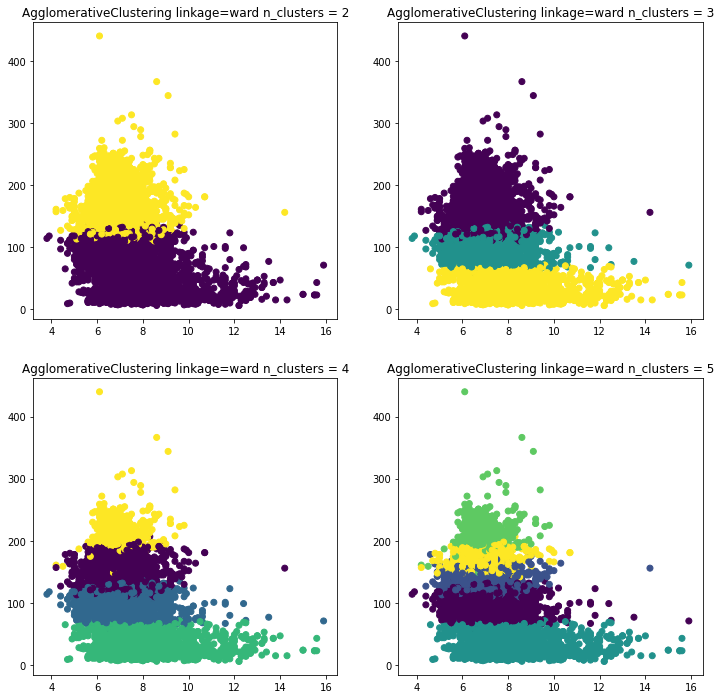

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(2,6):
  start_time=time.time()
  y_true=(X['total sulfur dioxide'] * 10).values
  y_pred = AgglomerativeClustering(n_clusters=i,linkage='ward').fit_predict(data)
  plt.subplot(2,2,i-1)
  plt.scatter(data[:, 0], data[:, 6], c=y_pred)
  plt.title("AgglomerativeClustering linkage=ward n_clusters = %d" % i)
  print("\n--- %s seconds with" % (time.time() - start_time), i , "clusters ---\n")
  print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
  print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
  print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
  print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
  print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
  
  

### Linkage = complete

 використовує максимальні відстані між усіма спостереженнями двох наборів


--- 1.3512969017028809 seconds with 2 clusters ---

adjusted rand score:  3.197266039225099e-06
adjusted mutual info:  0.00025325417035691966
v measure score:  0.0005622834237871669
completeness score:  0.9999999999995175
fowlkes mallows score:  0.07187729977626665

--- 1.2224831581115723 seconds with 3 clusters ---

adjusted rand score:  0.006301580557412064
adjusted mutual info:  0.17196896427654346
v measure score:  0.1785264284715308
completeness score:  0.8723842817294473
fowlkes mallows score:  0.08821208377407107

--- 1.1985135078430176 seconds with 4 clusters ---

adjusted rand score:  0.006330181410339199
adjusted mutual info:  0.1737680410338241
v measure score:  0.18170990628702383
completeness score:  0.8745311718032869
fowlkes mallows score:  0.0882880897190599

--- 1.2076590061187744 seconds with 5 clusters ---

adjusted rand score:  0.01574293768735166
adjusted mutual info:  0.2867424071246759
v measure score:  0.29810180966419686
completeness score:  0.9004998603398298

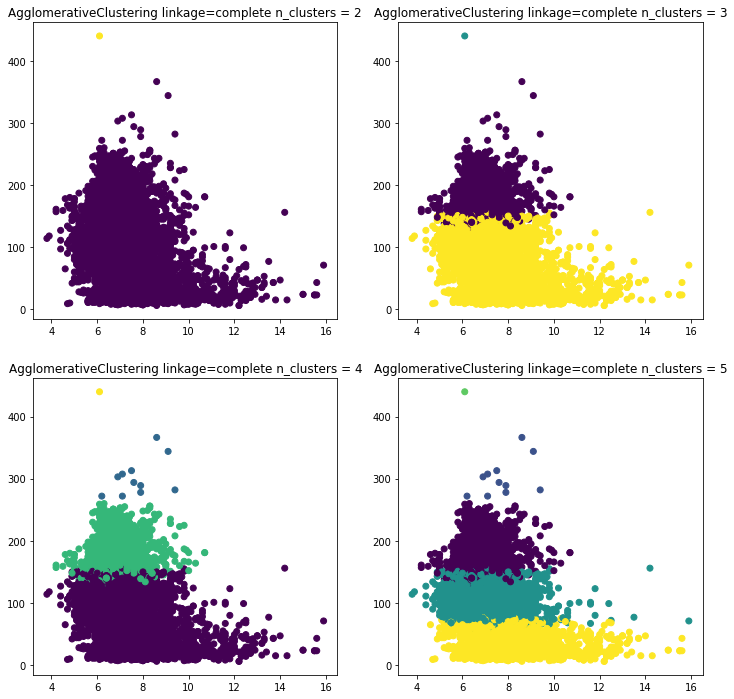

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(2,6):
  start_time=time.time()
  y_true=(X['total sulfur dioxide'] * 10).values
  y_pred = AgglomerativeClustering(n_clusters=i,linkage='complete').fit_predict(data)
  plt.subplot(2,2,i-1)
  plt.scatter(data[:, 0], data[:, 6], c=y_pred)
  plt.title("AgglomerativeClustering linkage=complete n_clusters = %d" % i)
  print("\n--- %s seconds with" % (time.time() - start_time), i , "clusters ---\n")
  print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
  print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
  print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
  print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
  print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
  

### Linkage = average

використовує середнє значення відстаней кожного спостереження двох наборів.


--- 1.5750408172607422 seconds with 2 clusters ---

adjusted rand score:  3.197266039225738e-06
adjusted mutual info:  0.00025325417035676115
v measure score:  0.0005622834237871669
completeness score:  0.9999999999995175
fowlkes mallows score:  0.07187729977626665

--- 1.3187472820281982 seconds with 3 clusters ---

adjusted rand score:  3.843693644040301e-05
adjusted mutual info:  0.0030147732797264296
v measure score:  0.005217996712646471
completeness score:  1.0000000000000113
fowlkes mallows score:  0.07199913486346636

--- 1.2994787693023682 seconds with 4 clusters ---

adjusted rand score:  0.006821333559421795
adjusted mutual info:  0.1859851301294525
v measure score:  0.1938157667106285
completeness score:  0.9483096143411501
fowlkes mallows score:  0.09170754756421064

--- 1.2924296855926514 seconds with 5 clusters ---

adjusted rand score:  0.006821205950295035
adjusted mutual info:  0.18595126960799385
v measure score:  0.19404471922415154
completeness score:  0.948043969

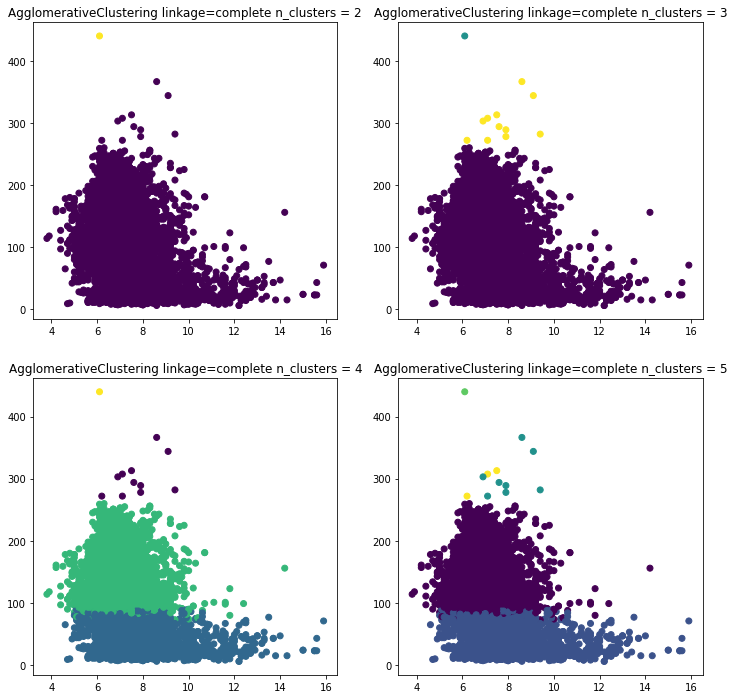

In [15]:
plt.figure(figsize=(12, 12))
for i in range(2,6):
  start_time=time.time()
  y_true=(X['total sulfur dioxide'] * 10).values
  y_pred = AgglomerativeClustering(n_clusters=i,linkage='average').fit_predict(data)
  plt.subplot(2,2,i-1)
  plt.scatter(data[:, 0], data[:, 6], c=y_pred)
  plt.title("AgglomerativeClustering linkage=complete n_clusters = %d" % i)
  print("\n--- %s seconds with" % (time.time() - start_time), i , "clusters ---\n")
  print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
  print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
  print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
  print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
  print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
  

# Spectral clustering

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  try:



--- 118.69022941589355 seconds with 2 clusters ---

adjusted rand score:  -3.623379627645096e-05
adjusted mutual info:  -0.0005588057516296487
v measure score:  0.002644573557265348
completeness score:  0.5968325905613516
fowlkes mallows score:  0.06995564218059394
Q1:  8332490.882480993
Q2:  19729.433740114917
Q1/Q2:  422.33806566576396


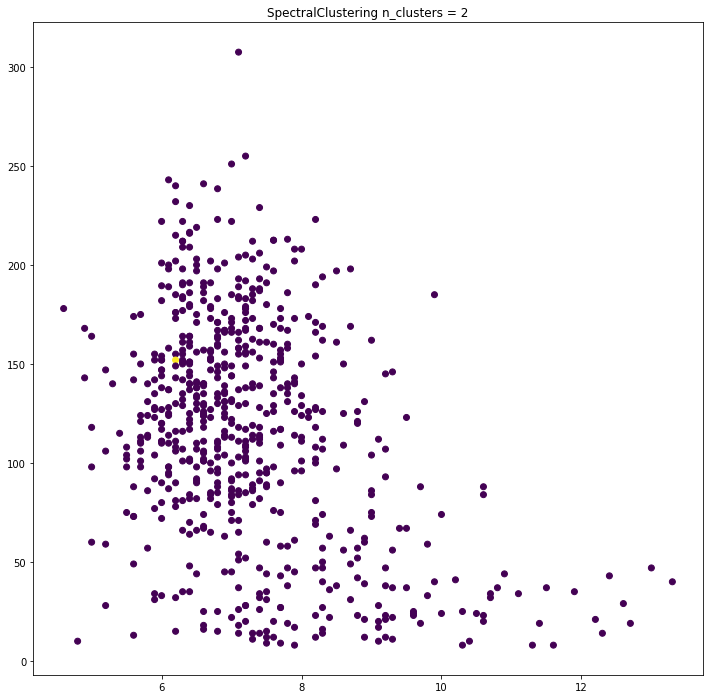

In [14]:
plt.figure(figsize=(12, 12))
# for i in range(2,6):
start_time=time.time()
y_true=(X['total sulfur dioxide'] ).values
y_true = y_true[::10]
x_train = SpectralClustering(n_clusters=2).fit(data[::10])
y_pred = x_train.labels_
# plt.subplot(2, 2, i-1)
plt.scatter(data[::10, 0], data[::10, 6], c=y_pred)
plt.title("SpectralClustering n_clusters = 2")
print("\n--- %s seconds with" % (time.time() - start_time),"2 clusters ---\n")
print("adjusted rand score: ",adjusted_rand_score(y_true,y_pred))                       #-1.0 - 1.0
print("adjusted mutual info: ", adjusted_mutual_info_score(y_true,y_pred))              #-1.0 - 1.0
print("v measure score: ", v_measure_score(y_true,y_pred))                              # 0.0 - 1.0
print("completeness score: ", completeness_score(y_true,y_pred))                        # 0.0 - 1.0
print("fowlkes mallows score: ", fowlkes_mallows_score(y_true,y_pred))                  # 0.0 - 1.0
Q1 = 0
Q2 = 0
Q3 = 0
for k in range(i):
  q1 = 0
  q2 = 0
  row_xk = np.where(y_pred == k)
  x_k=data[row_xk]
  row_yk = np.where(y_pred > k)
  y_k=data[row_yk]
  for l in range(len(x_k)):
    for j in range(l+1,len(x_k)):
      q1+=np.linalg.norm(x_k[l]-x_k[j])
  Q1+=q1
  for l in range(len(x_k)):
    for j in range(len(y_k)):
      q2+=np.linalg.norm(x_k[l]-y_k[j])
  Q2+=q2
Q3=Q1/Q2 
print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q1/Q2: ", Q3)
  

4646

6497